In [1]:
from google.colab import files
files.upload()


Saving train.csv to train.csv


{'train.csv': b'datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count\n2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16\n2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40\n2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32\n2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13\n2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1\n2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.0032,0,1,1\n2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0,2,0,2\n2011-01-01 07:00:00,1,0,0,1,8.2,12.88,86,0,1,2,3\n2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0,1,7,8\n2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0,8,6,14\n2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36\n2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56\n2011-01-01 12:00:00,1,0,0,1,17.22,21.21,77,19.0012,29,55,84\n2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94\n2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106\n2011-01-01 15:00:00,1,0,0,2,18.04,21.97,77,1

In [2]:
# Create Kaggle directory and move the API token
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle competitions download -c bike-sharing-demand


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [4]:
!unzip bike-sharing-demand.zip


unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [5]:
import pandas as pd

df = pd.read_csv('train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])  # Convert to datetime format
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
print(df.dtypes)
print("Number of rows:", len(df))
print("Missing values:\n", df.isnull().sum())


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object
Number of rows: 10886
Missing values:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [7]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['hour'] = df['datetime'].dt.hour


In [8]:
df['season'] = df['season'].replace({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})


In [9]:
df.groupby('year')[['casual', 'registered']].sum()


,casual,registered
year,,
2011,155817,626162
2012,236318,1067179


In [10]:
df.groupby('season')['count'].mean().sort_values(ascending=False)


,count
season,
fall,234.417124
summer,215.251372
winter,198.988296
spring,116.343261


Question 6: Calculate the mean of the hourly total rentals count by season. Which season has the highest mean ?

Answer: Season: **Fall** has highest counts of hourly rentals.

In [11]:
# Registered users
registered_group = df.groupby(['year', 'workingday'])['registered'].mean()
# Casual users
casual_group = df.groupby(['year', 'workingday'])['casual'].mean()

print("Registered users:\n", registered_group)
print("\nCasual users:\n", casual_group)



Registered users:
 year  workingday
2011  0              97.153132
      1             124.031909
2012  0             160.767429
      1             211.587507
Name: registered, dtype: float64

Casual users:
 year  workingday
2011  0             48.201276
      1             19.664143
2012  0             70.250286
      1             30.527733
Name: casual, dtype: float64


Question 7: Are more bikes rented by registered users on working or non-working days ?

Answer: More bikes are rented by registered users on working days in both years.

Question 7(1): Does the answer differ for non-registered users ?

Answer: Yes — casual users rent more on non-working days.

Question 7(2): Is the answer the same for both years?

Answer: Yes, the same pattern holds in both 2011 and 2012.

In [12]:
df_2011 = df[df['year'] == 2011]
df_2012 = df[df['year'] == 2012]

monthly_2011 = df_2011.groupby('month')['count'].sum()
monthly_2012 = df_2012.groupby('month')['count'].sum()

print("2011 - Max:", monthly_2011.idxmax(), "Min:", monthly_2011.idxmin())
print("2012 - Max:", monthly_2012.idxmax(), "Min:", monthly_2012.idxmin())


2011 - Max: 7 Min: 1
2012 - Max: 9 Min: 1


Question 8: Which months in the year 2011 have the highest and the lowest total number of bikes rented? Repeat for the year 2012?

Answer: In Year 2011, maximum rentals achieved in July and Mininum in January.
In Year 2012, Maximum Rentals achieved in September month and mininum in January.


In [13]:
weather_map = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}

df['weather_desc'] = df['weather'].map(weather_map)

df.groupby('weather_desc')['count'].mean().sort_values(ascending=False)


,count
weather_desc,
"Clear, Few clouds, Partly cloudy, Partly cloudy",205.236791
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",178.955540
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",164.000000
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",118.846333


Question 9: Which type of weather has the highest and lowest mean of the hourly total rentals count?

Answer: The Highest count relies in Clear, Few clouds, Partly cloudy weather and lowest count relies on Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.

Whereas people prefer rides during clear and partly cloudy times which is obvious. And less preference are in bad weather.



In [ ]:
correlations = df.corr(numeric_only=True)['count'].sort_values(ascending=False)
print(correlations)

Question 10: Calculate the correlation between the hourly total rentals count and all the numerical columns in the dataset. Which column has the highest correlation with the total rentals count ?

Answer: The total number of hourly bike rentals has the strongest positive correlation with the number of **registered** users.

Temperature (temp) and "feels like" temperature (atemp) show moderate positive correlations, while humidity shows a noticeable negative correlation (i.e., more humidity → fewer rentals).

In [14]:
def get_day_period(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

df['day_period'] = df['hour'].apply(get_day_period)


In [15]:
pivot = df.pivot_table(values='count', index='day_period', columns='workingday', aggfunc='mean')
print(pivot)


workingday           0           1
day_period                        
afternoon   371.022989  266.196141
evening     180.182759  251.054662
morning     157.772414  234.353763
night        44.052083   16.217582


Question: 12 - Generate a pivot table for the mean of the hourly total rentals count, with the index set to the day period and the column set to the working day column. What can you observe from the table ?

Answer:

**Afternoon**

Non-working days (371) have much higher rentals — people likely use bikes for leisure during the day.

**Morning**

Working days (234) dominate, likely due to commuting.

**Evening**

Working days (251) again show higher usage — perhaps return commutes or post-work activities.

**Night**

Rentals are low overall, but higher on non-working days, likely for social activities or late night travels.

Trend Analysis: Rentals Over Time

<Axes: title={'center': 'Daily Bike Rentals Over Time'}, xlabel='datetime'>

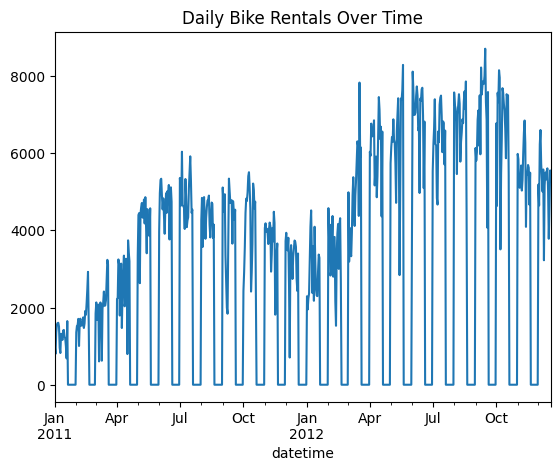

In [16]:
df.set_index('datetime')['count'].resample('D').sum().plot(title='Daily Bike Rentals Over Time')


Hourly Rental Patterns by User Type

<Axes: title={'center': 'Hourly Rental Patterns'}, xlabel='hour'>

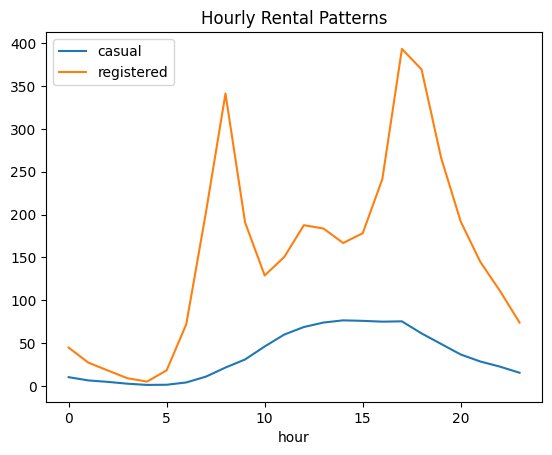

In [17]:
df.groupby('hour')[['casual', 'registered']].mean().plot(title='Hourly Rental Patterns')


Top 5 Busiest and Quietest Hours Overall

In [18]:
df.groupby('hour')['count'].mean().sort_values(ascending=False).head(5)
df.groupby('hour')['count'].mean().sort_values().head(5)


,count
hour,
4,6.407240
3,11.757506
5,19.767699
2,22.899554
1,33.859031


In [19]:
df.groupby('hour')['count'].mean().sort_values(ascending=False).head(5)


,count
hour,
17,468.765351
18,430.859649
8,362.769231
16,316.372807
19,315.278509


The Highest bike rentals does during 5 pm which may be returing to home from office might plays a vital role.


 Effect of Weather on Different User Types

In [20]:
weather_grouped = df.groupby('weather_desc')[['casual', 'registered']].mean()
print(weather_grouped.sort_values(by='registered', ascending=False))


                                                       casual  registered
weather_desc                                                             
Clear, Few clouds, Partly cloudy, Partly cloudy     40.308676  164.928115
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...   6.000000  158.000000
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  30.785462  148.170078
Light Snow, Light Rain + Thunderstorm + Scatter...  17.442375  101.403958


Weekend vs Weekday Hourly Trends

<Axes: title={'center': 'Hourly Trends: Weekday vs Weekend'}, xlabel='hour'>

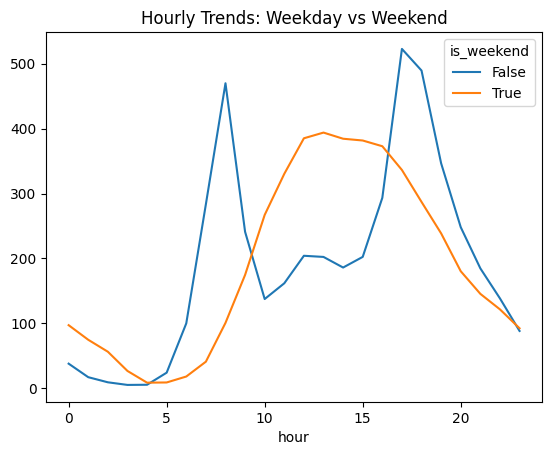

In [21]:
df['weekday'] = df['datetime'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5
df.groupby(['hour', 'is_weekend'])['count'].mean().unstack().plot(title='Hourly Trends: Weekday vs Weekend')


The Weekdays have highest trends compared to Weekends.